### Step 0: Setting up for the project

In [38]:
# pakages
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import openai

### Step 1: Call the prompt files from the prompt folder(complete_prompt_text)

In [39]:
# type all the prompts you need
# type "stop" to finish type the prompts
pmpt_lst = []
pmpt_count = 0

print("Type \"stop\" to stop putting your text files.")

flist = os.listdir(r'___your__"Prompt_Files"__location___') # hello
print("File list:")
print(flist)

while True:
  pmpt = input()
  if pmpt == "stop":
    break
  elif pmpt not in flist:
    print("File not found")
  else:
    pmpt_lst.append(pmpt)
    pmpt_count += 1

Type "stop" to stop putting your text files.
File list:
['employment.txt', 'shoes.txt', 'testing.txt']


In [40]:
# assmeble all the prompt files to "complete_prompt_text"
num = 0
complete_prompt_text = ""

while num < pmpt_count:
  with open("___your__\"Prompt_Files\"__location___" + pmpt_lst[num], encoding='utf8') as kb_text:
    prompt_text = kb_text.read()
    complete_prompt_text += prompt_text
    num += 1

### Step 2: Assemble the instruction text file and the prompt text files(complete_text)

In [41]:
# add the instructions to "complete_prompt_text"
with open(r"___your__\"Instruction.txt\"__location___") as instructions:
  instructions_text = instructions.read()

complete_text = instructions_text + complete_prompt_text

In [42]:
# This is the final text which will be passed to OpenAI
complete_text

'Given a prompt, extrapolate as many relationships as possible from it and provide a list of updates.\n\nIf an update is a relationship, provide ENTITY 1, RELATIONSHIP, ENTITY 2. The relationship is directed, so the order matters.\n\nExample: prompt: Sun is source of solar energy. It is also source of Vitamin D. updates: "Sun", "source of", "solar energy", "Sun","source of", "Vitamin D"\n\nJust give me those relationships without numberings.\n\nGive me exactly three objects per a relationship.\n\nGive me many relationships as you can.\n\nHere is my prompt.Equal Employment Opportunity\nEqual Opportunity is the expressed policy of SmithCo. Our policy is to select the best-qualified person for each position in the organization and to conduct all business relationships without prejudice. SmithCo is committed to the principles of equal employment opportunity for all employees and applicants for employment. Advancement opportunities and employment decisions will be made without regard to rac

### Step 3: Put "complete_text" file into OpenAI and get the relationships

In [43]:
# interacting with OpenAI
# Extract relationships from OpenAI
from openai import OpenAI

client = OpenAI(
    api_key='___your__OpenAI__API__keys___',
)

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-4-turbo",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

if __name__ == "__main__":
    user_input = complete_text
    response = chat_gpt(user_input)
    print(response)

"SmithCo", "expresses policy of", "Equal Opportunity"
"SmithCo", "has policy of", "selecting best-qualified person for positions"
"SmithCo", "conducts", "business relationships without prejudice"
"SmithCo", "committed to", "equal employment opportunity"
"SmithCo", "makes advancement opportunities", "independent of race, creed, color"
"SmithCo", "makes employment decisions", "independent of sex, national origin, ancestry"
"SmithCo", "makes employment decisions", "independent of age, physical or mental handicap"
"SmithCo", "makes employment decisions", "independent of veteran or military status"
"SmithCo", "makes employment decisions", "independent of any protected characteristic under law"
"SmithCo managers", "expected to", "seek diverse pool of candidates"
"SmithCo", "develops", "annual Affirmative Action program"
"SmithCo", "has status of", "government contractor"
"SmithCo leadership", "demonstrates", "commitment to equal employment opportunities"
"SmithCo", "extends Equal Opportunity

### Step 4: Process the response from OpenAI

In [44]:
# processing OpenAI's text response
edit1 = response.replace("\n", ", ")
edit2 = edit1.replace('\"', '')
edit3 = edit2.replace(" , ", ' ')
edit4 = edit3.replace("  ", ', ')
edit5 = edit4.lower()
processed = edit5 + ","
processed

'smithco, expresses policy of, equal opportunity, smithco, has policy of, selecting best-qualified person for positions, smithco, conducts, business relationships without prejudice, smithco, committed to, equal employment opportunity, smithco, makes advancement opportunities, independent of race, creed, color, smithco, makes employment decisions, independent of sex, national origin, ancestry, smithco, makes employment decisions, independent of age, physical or mental handicap, smithco, makes employment decisions, independent of veteran or military status, smithco, makes employment decisions, independent of any protected characteristic under law, smithco managers, expected to, seek diverse pool of candidates, smithco, develops, annual affirmative action program, smithco, has status of, government contractor, smithco leadership, demonstrates, commitment to equal employment opportunities, smithco, extends equal opportunity policy, to all employment phases, smithco, applies equal opportuni

In [45]:
# put all the keywords in the processed text into the list
all_key_words = []

accum_char = 0
save_char = 0

while accum_char < len(processed):
  if processed[accum_char] == ",":
     all_key_words.append(processed[save_char:accum_char])
     save_char = accum_char + 2
     accum_char = save_char
  else:
     accum_char += 1

In [46]:
# separate the list above into three lists
entity1  = []
relation = []
entity2  = []

for i in range(len(all_key_words)):
  if i % 3 == 0:
    entity1.append(all_key_words[i])
  elif i % 3 == 1:
    relation.append(all_key_words[i])
  else:
    entity2.append(all_key_words[i])

In [47]:
# check if it works properly
print(len(all_key_words))
print(len(entity1))
print(len(relation))
print(len(entity2))

84
28
28
28


### Step 5: Convert three lists into dataframe, then genearte csv file and save it in the folder

In [48]:
# convert lists into dataframes
df1 = pd.DataFrame(entity1, columns = ['Entity1'])
df2 = pd.DataFrame(relation, columns = ['Relation'])
df3 = pd.DataFrame(entity2, columns = ['Entity2'])

relationships = pd.concat([df1, df2, df3], axis=1)

In [49]:
# the final version of the relationship dataframe
relationships

,Entity1,Relation,Entity2
0,smithco,expresses policy of,equal opportunity
1,smithco,has policy of,selecting best-qualified person for positions
2,smithco,conducts,business relationships without prejudice
3,smithco,committed to,equal employment opportunity
4,smithco,makes advancement opportunities,independent of race
5,creed,color,smithco
6,makes employment decisions,independent of sex,national origin
7,ancestry,smithco,makes employment decisions
8,independent of age,physical or mental handicap,smithco
9,makes employment decisions,independent of veteran or military status,smithco


In [50]:
# convert the dataframe to csv file and save it to the folder
relationships.to_csv(r'___your__"Relationships.csv"__location')

### Step 6: Draw the KG graph based on the dataframe, and save the image file of the graph

In [51]:
# Make dataframe for kg graph
KG_graph = pd.DataFrame({'entity1': entity1, 'entity2': entity2, 'edge': relation})
rel_labels = dict(zip(zip(KG_graph.entity1, KG_graph.entity2), KG_graph.edge))

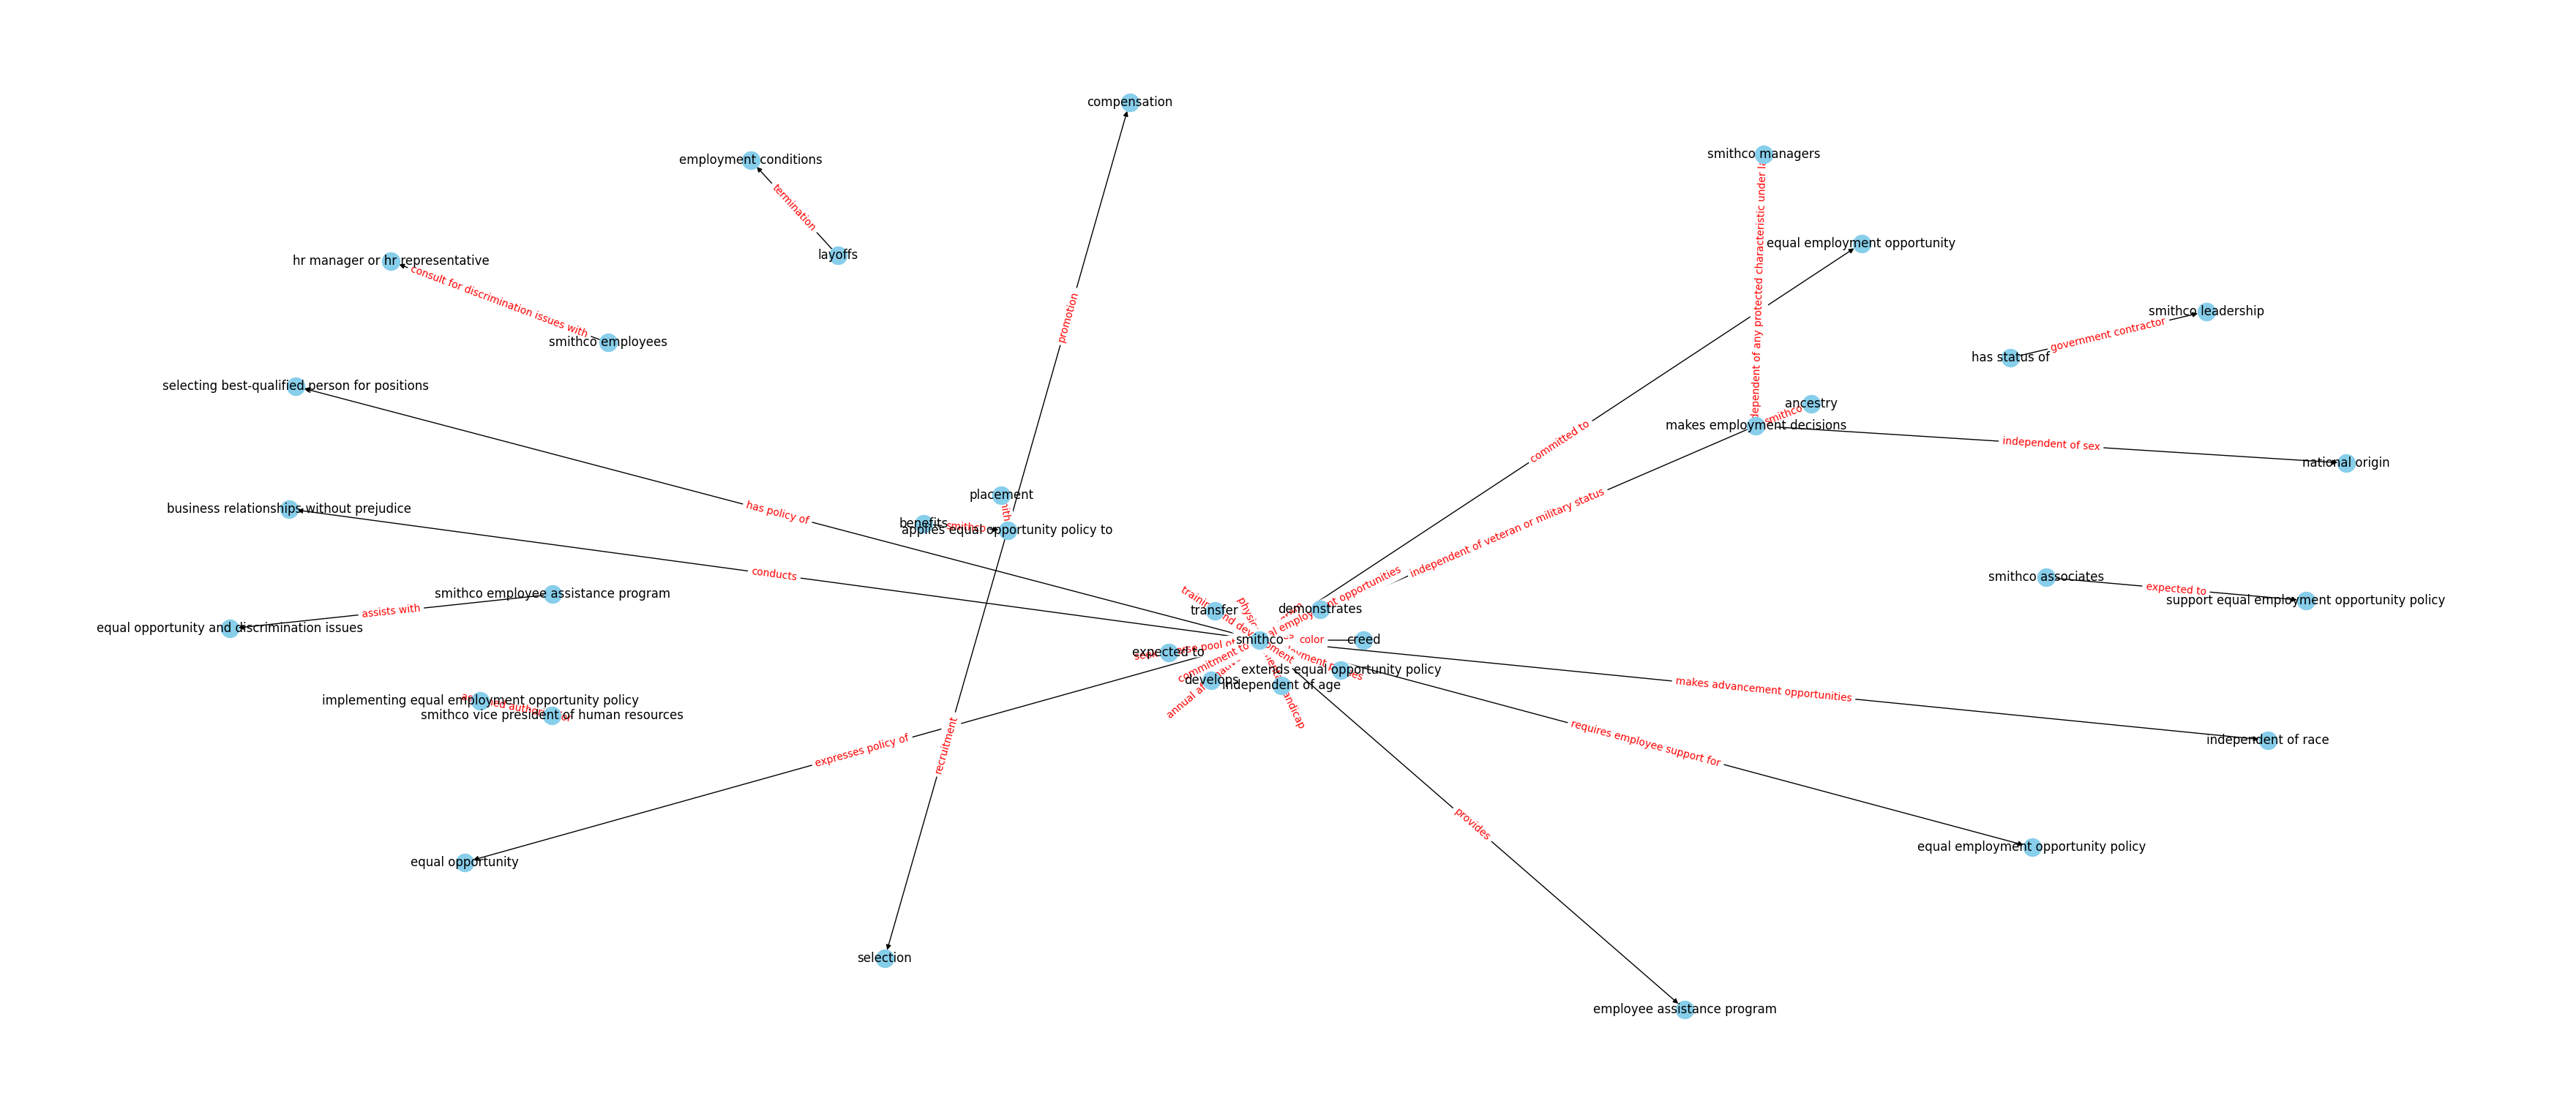

In [52]:
# Generating knowledge graph
G = nx.from_pandas_edgelist(KG_graph, "entity1", "entity2",
                            edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(35, 15))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
nx.draw_networkx_edge_labels(
  G,
  pos,
  edge_labels=rel_labels,
  font_color='red'
)

# download the image file of the knowledge graph
plt.savefig(r'___your__"final_graph.png"__location___')

# show the image of the knowledge graph
plt.show()